This code runs a basic digital quantum simulation of the time evolution of a single particle in 1-D space.
We follow the general framework introduced in the slides: 

1. How do we represent the position and momentum of the particle using qubits?

2. How do we initialize and measure the qubits? 

3. How do we simulate time evolution? 

4. How do we change between momentum and position bases? 

5. How do we implement diagonal unitaries? 

The first two are done naturally using the standard Qiskit operations. Time evolution can be simulated using trotterization. The bases changes can be done using QFT, since the fourier transform of a particle's state in the momentum basis gives us the state in the position basis. 

### Simulating Time Evolution
We will use the following Hamiltonian to simulate time evolution

$\hat{H} = \frac{\hat{p}^2}{2m} + V(\hat{x})$

which can be represented in our circuit using the unitary

$\hat{U} = \text{exp}(-i\hat{H}t / \hslash)$

Import the necessary components

In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

Initialize a quantum circuit with 3 counting bits and one state bit. Here we set the state to |psi> = |1>. After this, apply Hadamard gates to the counting bits to prepare for Quantum Phase Estimation.


Updated


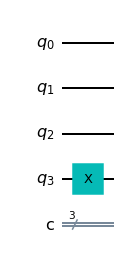

In [3]:
qpe = QuantumCircuit(4, 3)
qpe.x(3)
qpe.draw('mpl')

for qubit in range(3):
    qpe.h(qubit)
qpe.draw('mpl')

Notes: Fourier transform of the momentum operator is the position operator.